# My first data analysis in Azure AI

In [1]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


## STEP 1: Get the Dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv('https://github.com/ybifoundation/Dataset/raw/main/Credit%20Default.csv')

dataset.head()

,Income,Age,Loan,Loan to Income,Default
0,66155.92510,59.017015,8106.532131,0.122537,0
1,34415.15397,48.117153,6564.745018,0.190752,0
2,57317.17006,63.108049,8020.953296,0.139940,0
3,42709.53420,45.751972,6103.642260,0.142911,0
4,66952.68885,18.584336,8770.099235,0.130990,1


# STEP 2: EDA (Exploratory data analysis)

- Observation


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Income          2000 non-null   float64
 1   Age             2000 non-null   float64
 2   Loan            2000 non-null   float64
 3   Loan to Income  2000 non-null   float64
 4   Default         2000 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 78.2 KB


In [5]:
dataset.describe()

,Income,Age,Loan,Loan to Income,Default
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,45331.600018,40.927143,4444.369695,0.098403,0.141500
std,14326.327119,13.262450,3045.410024,0.057620,0.348624
min,20014.489470,18.055189,1.377630,0.000049,0.000000
25%,32796.459720,29.062492,1939.708847,0.047903,0.000000
50%,45789.117310,41.382673,3974.719418,0.099437,0.000000
75%,57791.281670,52.596993,6432.410625,0.147585,0.000000
max,69995.685580,63.971796,13766.051240,0.199938,1.000000


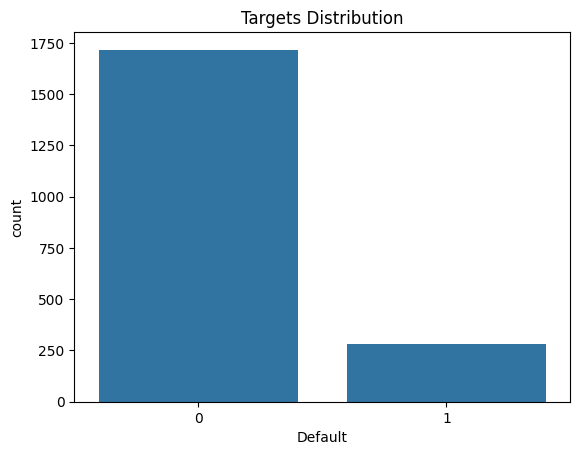

In [8]:
counter = dataset["Default"].value_counts()

sns.countplot(x="Default", data=dataset)
plt.title("Targets Distribution")
plt.show()


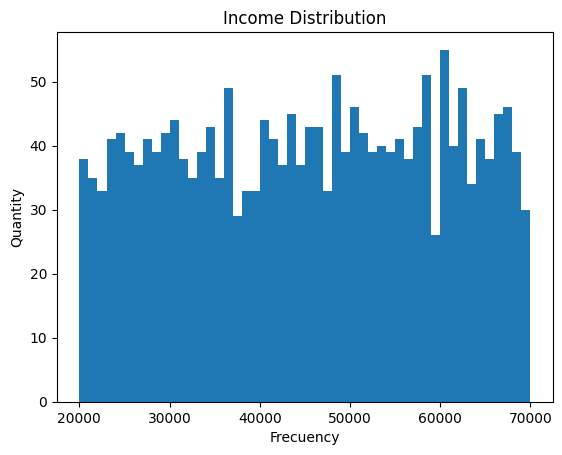

In [11]:
# Characteristic analysis Histogram

plt.hist(dataset['Income'], bins=50)
plt.title("Income Distribution")
plt.ylabel("Quantity")
plt.xlabel("Frecuency")
plt.show()


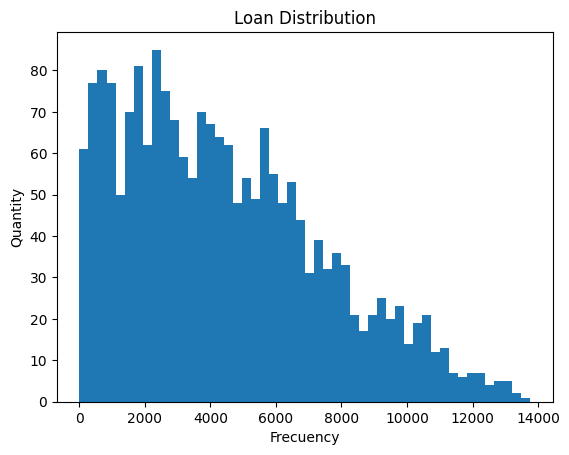

In [12]:
# Characteristic analysis Histogram

plt.hist(dataset['Loan'], bins=50)
plt.title("Loan Distribution")
plt.ylabel("Quantity")
plt.xlabel("Frecuency")
plt.show()


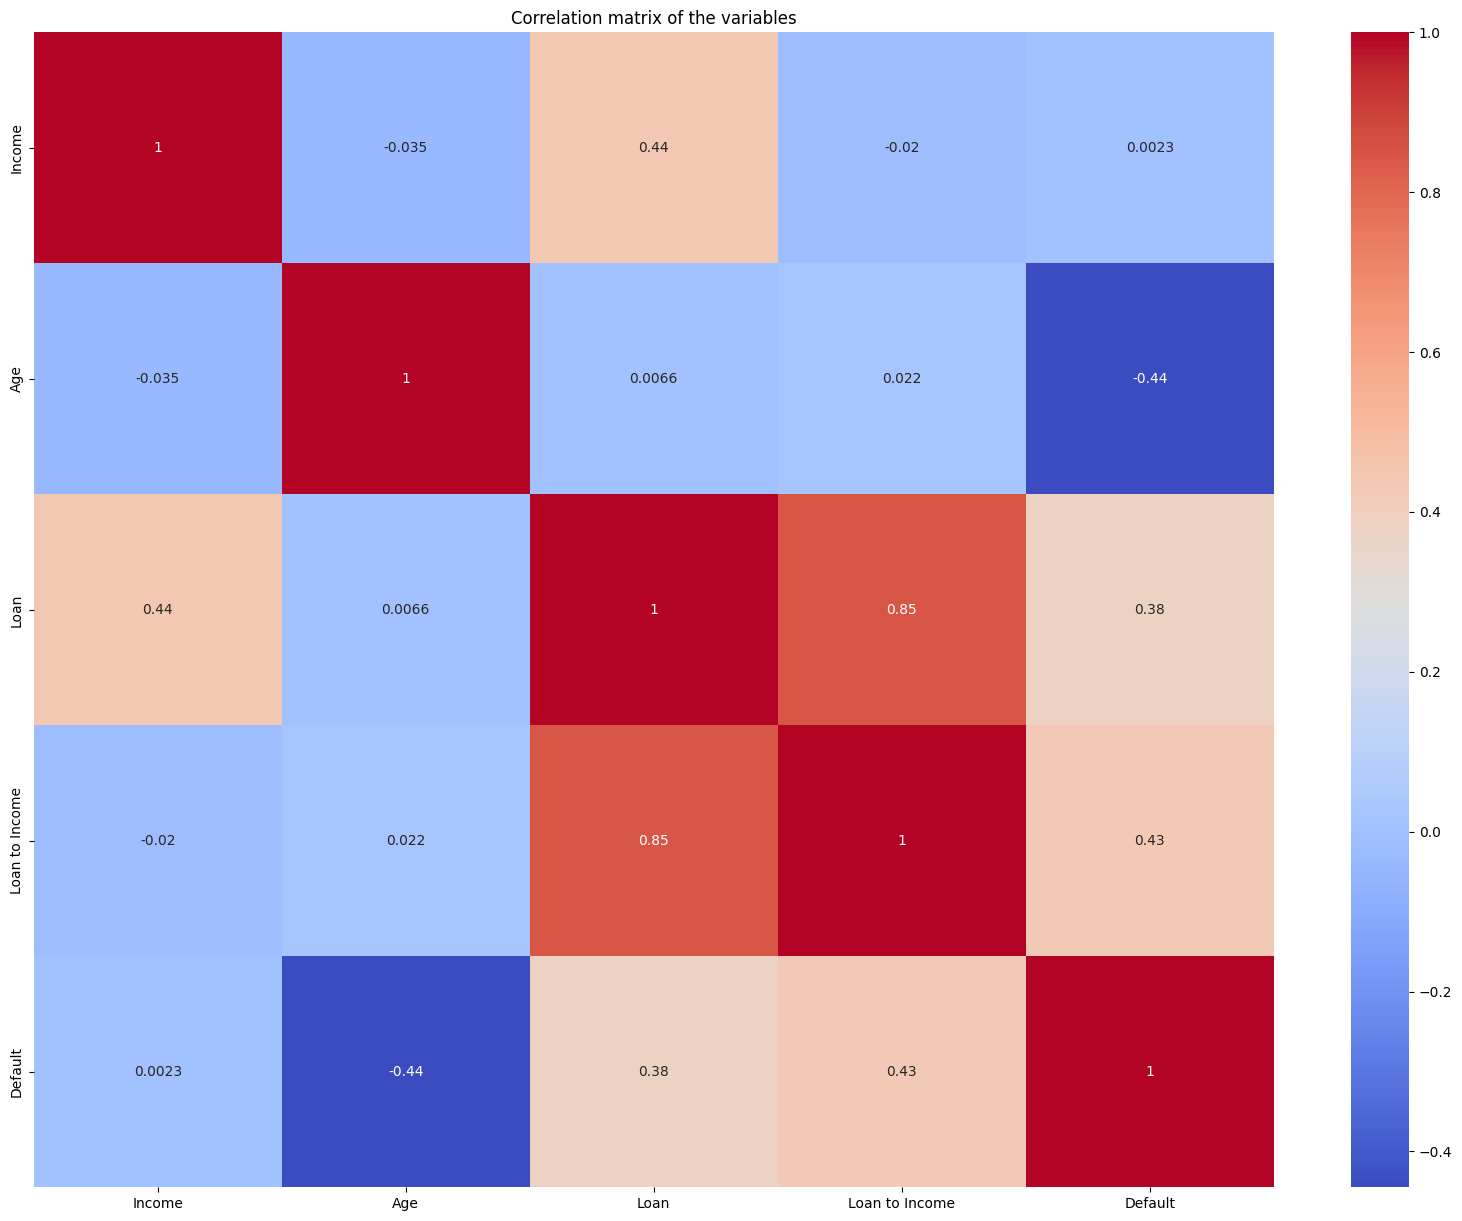

In [13]:
corr_matrix = dataset.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap='coolwarm')
plt.title("Correlation matrix of the variables")
plt.show()

# STEP 3: Preprocessing

- Data cleaning and preparatio

In [14]:
dataset.isnull().sum()

Income            0
Age               0
Loan              0
Loan to Income    0
Default           0
dtype: int64

- If the column is missing more than 50% of its data, delete it.

In [15]:
data1 = dataset.drop(columns=["Age"])
data1

,Income,Loan,Loan to Income,Default
0,66155.92510,8106.532131,0.122537,0
1,34415.15397,6564.745018,0.190752,0
2,57317.17006,8020.953296,0.139940,0
3,42709.53420,6103.642260,0.142911,0
4,66952.68885,8770.099235,0.130990,1
...,...,...,...,...
1995,59221.04487,1926.729397,0.032535,0
1996,69516.12757,3503.176156,0.050394,0
1997,44311.44926,5522.786693,0.124636,1
1998,43756.05660,1622.722598,0.037086,0


In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

dataset[["Income", "Age", "Loan", "Loan to Income"]] = scaler.fit_transform(dataset[["Income", "Age", "Loan", "Loan to Income"]])

dataset

,Income,Age,Loan,Loan to Income,Default
0,1.453934,1.364333,1.202819,0.418950,0
1,-0.762176,0.542268,0.696427,1.603115,0
2,0.836821,1.672877,1.174711,0.721055,0
3,-0.183070,0.363887,0.544980,0.772625,0
4,1.509563,-1.685088,1.420765,0.565684,1
...,...,...,...,...,...
1995,0.969747,0.572514,-0.826907,-1.143431,0
1996,1.688540,-1.339834,-0.309130,-0.833407,0
1997,-0.071226,-0.973667,0.354201,0.455385,1
1998,-0.110003,1.738021,-0.926756,-1.064427,0
